## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import math

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[50, 58, 93],
       [12, 77, 78],
       [25, 66, 97],
       [17, 41, 89],
       [20, 91, 95],
       [18, 38, 76]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([50, 58, 93]), array([12, 77, 78]))

The lowest card in the game is

In [5]:
np.min(cards)

12

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

5.348


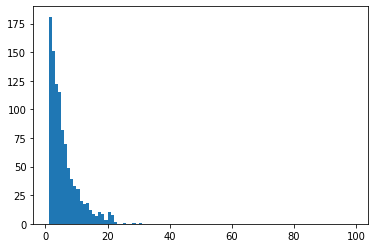

In [7]:
# To Do cell
random.seed(24)
N = 100
n = 6
k = 3
samp_size = 1000
samp_mins = []
for i in range(samp_size):
    temp_cards = sample_cards(N, n, k)
    samp_mins.append(np.min(temp_cards))
plt.hist(samp_mins, range(1, N))
print(np.mean(samp_mins))

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

17.062


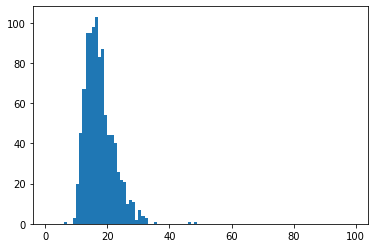

In [9]:
# To Do cell
def largest_gap_same(N, n, k, samp_size = 1000):
    samp_dist = []
    for i in range(samp_size):
        temp_cards = sample_cards(N, n, k)
        # flatten, sort, and find largest distance
        temp = temp_cards.flatten()
        temp.sort()
        samp_dist.append(max(np.diff(temp)))
    return samp_dist
one_samp_same = largest_gap_same(N, n, k)
plt.hist(one_samp_same, range(1, N))
print(np.mean(one_samp_same))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [39]:
# def largest_gap_diff(N, n, k, samp_size = 1000):
#     samp_gaps = []
#     for i in range(samp_size):
#         temp_cards = sample_cards(N, n, k)
#         # Index for player cards
#         player_card = np.zeros(n)
#         gaps = []
#         # While any player still hasn't used up all k cards
#         while any(player_card < k):
#             temp_mins = []
#             idx = 0
#             for card in player_card:
#                 # If player still hasn't played card
#                 if card < k:
#                     # Add min of each player's hand
#                     temp_mins.append(temp_cards[idx, int(card)])
#                 idx += 1
#             temp_min = np.min(temp_mins)
#             # Store largest gap
#             gaps.append(np.max(temp_mins - temp_min))
#             # Increment player with smallest card
#             for j in range(0, n):
#                 card = int(player_card[j])
#                 if card >= k:
#                     next
#                 elif temp_cards[j, card] == temp_min:
#                     player_card[j] += 1
#         samp_gaps.append(np.max(gaps))
#     return samp_gaps
# one_samp_diff = largest_gap_diff(N, n, k)
# np.mean(one_samp_diff)            

In [50]:
N = 100
n = 6
k = 3
def largest_gap_diff(N, n, k, samp_size = 1000):
    samp_gaps = []
    for _ in range(samp_size):
        temp = sample_cards(N, n, k)
        # Create index of players
        lst = []
        for i in range(n):
            for j in range(k):
                lst.append(i)
        # Create data frame with two cols: 1. flattened sample 2. corresponding player idx 
        df = pd.DataFrame({'card': temp.flatten(), 'player': lst})
        # Sort by card value and then difference both columns
        df = df.sort_values(by = ['card']).diff().tail(-1)
        # Remove consecutive cards from same players and find max
        largest_gap = np.max(df.loc[df['player'] != 0, "card"])
        samp_gaps.append(largest_gap)
    return samp_gaps
one_samp_diff = largest_gap_diff(N, n, k)
np.mean(one_samp_diff)  

16.316

(array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,  10.,  15.,  30.,
         75.,  79.,  94., 100.,  77.,  76.,  95.,  75.,  47.,  51.,  37.,
         39.,  20.,  24.,  11.,   7.,  13.,   7.,   2.,   1.,   4.,   0.,
          4.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

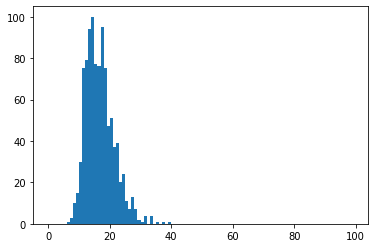

In [51]:
plt.hist(one_samp_diff, range(N))

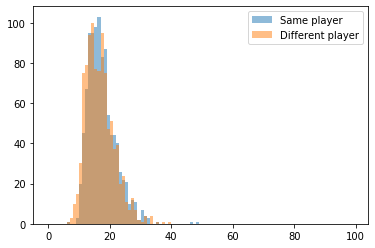

In [52]:
plt.hist(one_samp_same, range(N), alpha = 0.5, label = "Same player")
plt.hist(one_samp_diff, range(N), alpha = 0.5, label = "Different player")
plt.legend(loc='upper right')

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [53]:
# To Do cell
n_cands = [i for i in range(2, 11)]
k_cands = [j for j in range(1, 11)]
samp_means = np.empty([9, 10])
for n in n_cands:
    for k in k_cands:
        # Calculate largest differences
        temp_same = largest_gap_same(N, n, k)
        temp_diff = largest_gap_diff(N, n, k)
        # Save difference in means
        samp_means[n - 2, k - 1] = np.absolute(np.mean(temp_diff) - np.mean(temp_same))
# Create data frame for results
k_cands_col = [str(k) + " cards" for k in k_cands]
k_cands_col[0] = '1 card'
n_cands_row = [str(n) + " players" for n in n_cands]
sim_df = pd.DataFrame(samp_means, columns = k_cands_col, index = n_cands_row)
sim_df

,1 card,2 cards,3 cards,4 cards,5 cards,6 cards,7 cards,8 cards,9 cards,10 cards
2 players,1.612,7.430,6.571,5.886,5.320,4.196,3.940,3.287,3.531,2.745
3 players,0.121,2.980,3.152,2.225,1.714,1.505,1.406,1.097,1.085,0.956
4 players,0.691,1.483,1.572,1.179,0.951,0.964,0.643,0.754,0.536,0.556
5 players,0.535,1.161,1.043,0.696,0.518,0.450,0.578,0.540,0.342,0.364
6 players,0.036,0.617,0.727,0.282,0.513,0.334,0.396,0.136,0.166,0.112
7 players,0.145,0.609,0.299,0.431,0.313,0.353,0.296,0.101,0.173,0.138
8 players,0.109,0.110,0.138,0.318,0.080,0.154,0.146,0.124,0.131,0.086
9 players,0.034,0.375,0.321,0.245,0.210,0.120,0.031,0.102,0.098,0.002
10 players,0.412,0.389,0.222,0.010,0.195,0.151,0.040,0.090,0.071,0.000


Text(0.5, 1, 'Difference in Mean by # of Players and Cards')

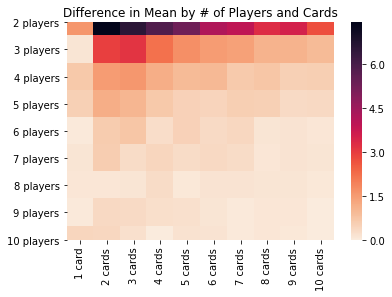

In [54]:
cmap = sns.cm.rocket_r
sns.heatmap(sim_df, cmap = cmap)
plt.title("Difference in Mean by # of Players and Cards")

Overall, upon examination of the data set and heat map, we see that the difference in means decreases as we increase the number of players. Similarly, the difference in means also decreases as we increase the number of cards. Thus, we see the largest difference when we keep both the number of players and cards small (i.e. 2-3 players with 2-3 cards each).

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [217]:
# To Do cell
n = 5 # 5 players, 5 cards each:
k = 5
# Success: the smallest card is less than 5
samp_list = []
for i in range(samp_size * 10):
    count = 0
    # n = 10 trials
    for j in range(10):
        count += (np.min(sample_cards(N, n, k)) < 5)
    samp_list.append(count)
# p = 1 - [(96 choose 25) / (100 choose 25)]
p = 0.69
binom_samp = np.random.binomial(10, p, size = samp_size * 10)

In [218]:
print(pd.DataFrame(samp_list).describe())
print(pd.DataFrame(binom_samp).describe())

                  0
count  10000.000000
mean       6.895000
std        1.451408
min        1.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
                  0
count  10000.000000
mean       6.907400
std        1.447769
min        2.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000


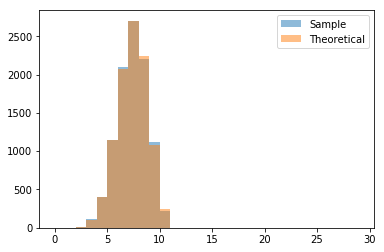

In [219]:
plt.hist(samp_list, range(30), alpha = 0.5, label = "Sample")
plt.hist(binom_samp, range(30), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

We derive the Binomial distribution by having one "trial" be whether or not the smallest card in one sample game is less than 5. One sample game will have 5 players with 5 cards each (25 cards total) and we will run 10 trials for each simulation. Thus we have a Binom(10, p = 0.69) distribution (the probability is derived from the code comments above).

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

5.2551


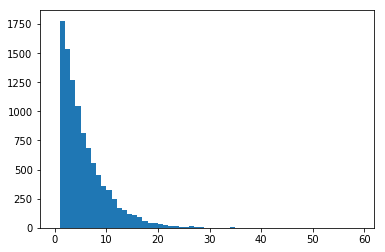

In [361]:
# To Do cell
n = 6
k = 3
samp_mins = []
for i in range(samp_size * 10):
    temp_cards = sample_cards(N, n, k)
    samp_mins.append(np.min(temp_cards))
plt.hist(samp_mins, range(60))
print(np.mean(samp_mins))

In [362]:
# Divide sample mins by 100 to fit [0, 1] scale
beta_samp = np.random.beta(1, 18, size = samp_size * 10)
temp_mins =  [samp / 100 for samp in samp_mins]
print(pd.DataFrame(beta_samp).describe())
print(pd.DataFrame(temp_mins).describe())

                  0
count  10000.000000
mean       0.053940
std        0.051145
min        0.000016
25%        0.016094
50%        0.038922
75%        0.075515
max        0.416230
                  0
count  10000.000000
mean       0.052551
std        0.045239
min        0.010000
25%        0.020000
50%        0.040000
75%        0.070000
max        0.400000


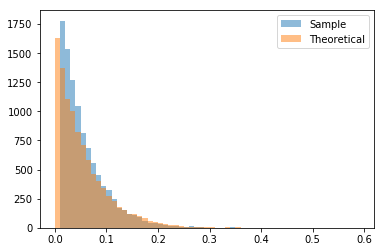

In [363]:
plt.hist(temp_mins, np.arange(0, .6, 0.01), alpha = 0.5, label = "Sample")
plt.hist(beta_samp, np.arange(0, .6, 0.01), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

In [270]:
new_mins = [-np.log(1 - samp / N) for samp in samp_mins]
exp_samp = np.random.exponential(1 / (n * k), size = samp_size * 10)
print(pd.DataFrame(exp_samp).describe())
print(pd.DataFrame(new_mins).describe())

                  0
count  10000.000000
mean       0.055756
std        0.055151
min        0.000005
25%        0.016771
50%        0.039383
75%        0.077319
max        0.505240
                  0
count  10000.000000
mean       0.056753
std        0.051007
min        0.010050
25%        0.020203
50%        0.040822
75%        0.072571
max        0.544727


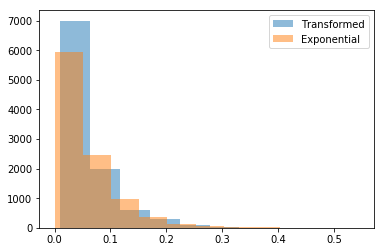

In [272]:
plt.hist(new_mins, alpha = 0.5, label = "Transformed")
plt.hist(exp_samp, alpha = 0.5, label = "Exponential")
plt.legend(loc='upper right')

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [326]:
# To Do cell
# Alter function to be able to sample with replacement
def sample_cards_rep(N, n, k, rep):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=rep)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

#### N = 100, with Replacement

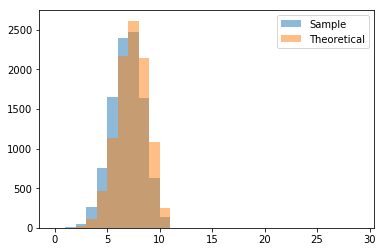

In [364]:
# To Do cell
n = 5 # 5 players, 5 cards each:
k = 5
N = 100
samp_size = 10000
# Success: the smallest card is less than 5
samp_lst = []
for i in range(samp_size):
    count = 0
    # n = 10 trials
    for j in range(10):
        count += (np.min(sample_cards_rep(N, n, k, True)) < 5)
    samp_lst.append(count)
# p = 1 - [(96 choose 25) / (100 choose 25)]
p = 0.69
binom_samp = np.random.binomial(10, p, size = samp_size)
plt.hist(samp_lst, range(30), alpha = 0.5, label = "Sample")
plt.hist(binom_samp, range(30), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

#### N = 100, without Replacement

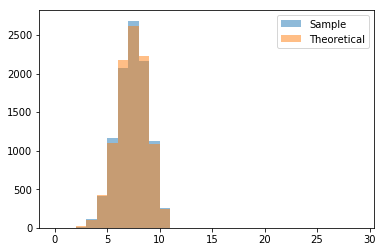

In [365]:
# To Do cell
n = 5 # 5 players, 5 cards each:
k = 5
N = 100
# Success: the smallest card is less than 5
samp_lst = []
for i in range(samp_size):
    count = 0
    # n = 10 trials
    for j in range(10):
        count += (np.min(sample_cards_rep(N, n, k, False)) < 5)
    samp_lst.append(count)
# p = 1 - [(96 choose 25) / (100 choose 25)]
p = 0.69
binom_samp = np.random.binomial(10, p, size = samp_size)
plt.hist(samp_lst, range(30), alpha = 0.5, label = "Sample")
plt.hist(binom_samp, range(30), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

#### N = 10000, with Replacement

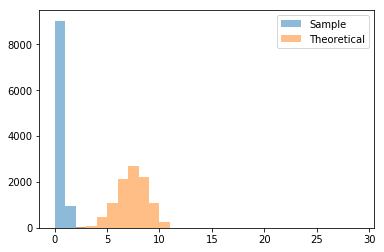

In [368]:
# To Do cell
n = 5 # 5 players, 5 cards each:
k = 5
N = 10000
# Success: the smallest card is less than 5
samp_lst = []
for i in range(samp_size):
    count = 0
    # n = 10 trials
    for j in range(10):
        count += (np.min(sample_cards_rep(N, n, k, True)) < 5)
    samp_lst.append(count)
# p = 1 - [(96 choose 25) / (100 choose 25)]
p = 0.69
binom_samp = np.random.binomial(10, p, size = samp_size)
plt.hist(samp_lst, range(30), alpha = 0.5, label = "Sample")
plt.hist(binom_samp, range(30), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

#### N = 10000, without Replacement

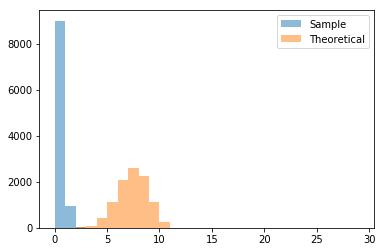

In [371]:
# To Do cell
n = 5 # 5 players, 5 cards each:
k = 5
N = 10000
# Success: the smallest card is less than 5
samp_lst = []
for i in range(samp_size):
    count = 0
    # n = 10 trials
    for j in range(10):
        count += (np.min(sample_cards_rep(N, n, k, False)) < 5)
    samp_lst.append(count)
# p = 1 - [(96 choose 25) / (100 choose 25)]
p = 0.69
binom_samp = np.random.binomial(10, p, size = samp_size)
plt.hist(samp_lst, range(30), alpha = 0.5, label = "Sample")
plt.hist(binom_samp, range(30), alpha = 0.5, label = "Theoretical")
plt.legend(loc='upper right')

When N is reasonably small (around 100), we see that the sampled data is able to resemble the target distribution well. If we sample with replacement, this resemblance is not as close as when we sample without replacement, but it still gives us a good representation of the target distribution. At very large N (say 10,000), we are not longer able to properly approximate the target distribution. Furthermore, since N is so much larger than $n * k$, there is no longer any discernable difference between sampling with replacement and sampling without replacement. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Kenneth Chen
- Member No2: 
- Member No3: